# Module Assessment

### Setup

Import required packages for effective operation of notebook

In [23]:
# Dates and times
import datetime as dt

# Data frames
import pandas as pd

# Yahoo finance data - yFinance (https://github.com/ranaroussi/yfinance)
import yfinance as yf

# Plots
import numpy as np

# Saving plots
import matplotlib.pyplot as plt

# IPython


### Assessment Tasks

1. Write a function titled get_data() to download previous 5 days for the FAANG stocks
2. Plot the data for each stock
3. Write faang.py script to perform task 1 and 2
4. Create GitHub Actions workflow to run script faang.yml every Saturday morninng

#### Problem 1. Funtion Creation

To create the 'get_data' function, '''yf.download''' will be used, with certain parameters specified, to align with the 5 day look back.

In [2]:
# Use yf.download to download hourly data over previos 5 days
#Source: https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html#yfinance.download

get_data = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period= '5d', interval= '1h')

# Show first 5 lines of the results
get_data.head(5)

/tmp/ipykernel_1639/74887220.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  get_data = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period= '5d', interval= '1h')
[*********************100%***********************]  5 of 5 completed


Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-11-04 14:30:00+00:00  268.429993  253.389999  280.269989  635.355774   
2025-11-04 15:30:00+00:00  270.609985  252.440094  279.376099  631.979980   
2025-11-04 16:30:00+00:00  270.010010  250.955002  278.250000  631.544983   
2025-11-04 17:30:00+00:00  270.638397  249.869995  277.450012  629.431702   
2025-11-04 18:30:00+00:00  270.510406  249.750000  278.679993  630.210022   

Price                                         High                          \
Ticker                            NFLX        AAPL        AMZN        GOOG   
Datetime                                                                     
2025-11-04 14:30:00+00:00  1098.313965  269.589996  255.440002  281.075012   
2025-11-04 15:30:00+00:00  1092.555054  271.000000  253.565002  281.833588   
2025-11-04 16:30:00+00:00  1095.069946  271.485992  252.535095  279.549988   
2025-11-04 17:30:00+00:00  1092.719971  270.929993  251.250000  278.410004   
2025-11-04 18:30:00+00:00  1090.724976  270.820007  250.330002  279.170013   

Price                                               ...        Open  \
Ticker                           META         NFLX  ...        AAPL   
Datetime                                            ...               
2025-11-04 14:30:00+00:00  641.739929  1104.599854  ...  268.242493   
2025-11-04 15:30:00+00:00  638.799988  1103.500000  ...  268.429993   
2025-11-04 16:30:00+00:00  633.450012  1096.719971  ...  270.640015   
2025-11-04 17:30:00+00:00  631.744995  1095.774048  ...  270.005005   
2025-11-04 18:30:00+00:00  632.789978  1095.310059  ...  270.609985   

Price                                                                       \
Ticker                           AMZN        GOOG        META         NFLX   
Datetime                                                                     
2025-11-04 14:30:00+00:00  250.380005  277.070007  628.039978  1099.285034   
2025-11-04 15:30:00+00:00  253.369995  280.220490  635.270020  1098.209961   
2025-11-04 16:30:00+00:00  252.429993  279.230011  631.992004  1092.359985   
2025-11-04 17:30:00+00:00  250.929993  278.239990  631.525024  1095.010010   
2025-11-04 18:30:00+00:00  249.850006  277.468292  629.409973  1092.540039   

Price                       Volume                                      
Ticker                        AAPL      AMZN     GOOG     META    NFLX  
Datetime                                                                
2025-11-04 14:30:00+00:00  9645778  10799520  3778209  5424088  626099  
2025-11-04 15:30:00+00:00  3278354   4292114  1285824  2766300  300006  
2025-11-04 16:30:00+00:00  3846826   2839567  1038904  1369778  226854  
2025-11-04 17:30:00+00:00  2072453   2541109   932536  1455797  172470  
2025-11-04 18:30:00+00:00  2562532   2476098   964787  1311694  257143  

[5 rows x 25 columns]

Given the above code can be seen to pull the requested dates; previous 5 days with 1 hour intervals, the following code can then be used to save the information with the required naming convention.

In [3]:
# Use datetime module to confirm current time.
# Source: https://docs.python.org/3/library/datetime.html#format-codes

now = dt.datetime.now()

# Show output
now


datetime.datetime(2025, 11, 10, 19, 16, 32, 675934)

This now needs to be converted into a string, and can be done so using '''now.strftime'''
https://www.w3schools.com/python/python_datetime.asp

In [4]:
# Convert date and time into string specifying:
# %Y - for year
# %m - for month

now.strftime('%Y%m%d-%H%M%S')

'20251110-191632'

Merging the above 2 codes will generate the exact time the code is ran, and capture it in a string format. 

In [5]:
# Capture date and time code is ran, and present as a string
time_stamp = dt.datetime.now().strftime('%Y%m%d-%H%M%S')

# Show
time_stamp

'20251110-191632'

This can then be expanded to be used as the filename, along with specifying the location for the file to be saved.

In [6]:
# File location is the 'data' folder, and will be a .csv file.
'../data/' + dt.datetime.now().strftime('%Y%m%d-%H%M%S') + '.csv'

'../data/20251110-191632.csv'

All can now be pulled together to save the previous 5 days for the given stocks.

In [11]:
# Save download as a .csv file
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

# Pull previous 5 days of data
get_data = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period= '5d', interval= '1h', auto_adjust=True)

# Generate time stamp of when data was pulled
time_stamp = dt.datetime.now().strftime('%Y%m%d-%H%M%S')

# Save into 'data' folder, titling file with time stamp
get_data.to_csv('data/' + time_stamp + '.csv')

[*********************100%***********************]  5 of 5 completed


### Problem 2: Plotting the Data

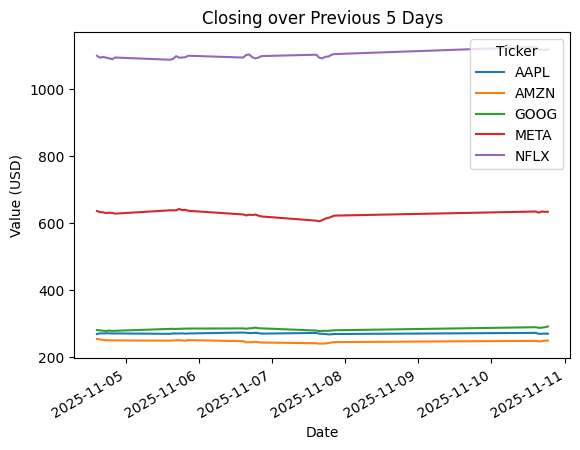

In [ ]:
# Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
plot_data = get_data['Close'].plot(title = 'Closing over Previous 5 Days', xlabel='Date', ylabel='Value (USD)')


plt.savefig('data/' + time_stamp)



### Problem 3: Create Script

For the script, `faang.py` was created in the main repository. Within this, the above three code lines were copied over:
- The first to pull the 5 day, hourly data for each of the stock.
- The second line to generate a timestamp of when ran.
- The final line to save the data into the `data` folder.

To run each of these, specific packages are also needed, so these too were added to the `faang.py` code:
- `yfinance` to pull the required stock data.
- `datetime` to create the timestamp.

This results in the below code.

```python

import datetime as dt

import yfinance as yf

get_data = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period= '5d', interval= '1h')

time_stamp = dt.datetime.now().strftime('%Y%m%d-%H%M%S')

get_data.to_csv('data/' + time_stamp + '.csv')

```

This `faang.py` code can be ran as normal using `python faang.py` in the main terminal however, to have the code operate when the user types `./faang.py`, firstly a shebang line (`#! /usr/bin/env python`) needs to be added to the very beginning of the code.

By adding the shebang line, it specifies the path to Python and means the user does not have to type `python` before the script name [source](https://realpython.com/python-shebang/).

One final check to ensure the script functions is to allow the file have permission to execute. To do so, in the same location where the `faang.py` script is located, in the terminal `chmod u+x faang.py` was ran. This changes the script to allow the user `u` to execute `x` the script.

To ensure this worked, `ls -l faang.py` was ran in the terminal. It outputted below, confimring it is executable given the `x` in `rwx`. 

```-rwxrw-rw- 1 codespace codespace 495 Nov  7 13:59 faang.py```

The script can now be ran in the terminal by simply typing `./faang.py`.

# End